# Step 1: Data Collection and Analysis

**Objective**: Load, clean, and get an initial understanding of the dataset. We will identify trends and patterns to lay the groundwork for further analysis.

## Step 1.1 - Load the Dataset

**Load the dataset from a CSV file.**  
Check its structure to understand the data types, column names, and initial content.

In [9]:

import pandas as pd
import numpy as np

# Load dataset (Assuming CSV format)
df = pd.read_csv('C:\\Users\\diyor\\Downloads\\healthcare_dataset.csv')

print("Dataset Info:")
print(df.info())

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display first few rows
print("\nFirst Few Records:")
print(df.head())

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memo

## Step 1.2 - Check for Missing Values and Duplicates

**Identify missing values in each column.**  
Determine if there are any duplicates that might affect data accuracy.

In [31]:
# Convert date columns to datetime
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())  # Count of missing values per column

# Remove duplicates if any
df.drop_duplicates(inplace=True)
print("\nNumber of Records after Removing Duplicates:", df.shape[0])



Missing Values:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
Length of Stay        0
Age_Group             0
Admission_Season      0
Billing_Tier          0
Cluster               0
dtype: int64

Number of Records after Removing Duplicates: 10000


## Step 1.3 - Basic Statistical Analysis

**Calculate summary statistics to get an overview of the dataset** (mean, median, standard deviation, etc.).  
Identify unique values in categorical columns (e.g., Gender, Medical Condition).

In [35]:
# Display basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Display unique values in categorical columns
print("\nUnique values in 'Gender':")
print(df['Gender'].unique())

print("\nUnique values in 'Medical Condition':")
print(df['Medical Condition'].unique())




Basic Statistics:
                Age              Date of Admission  Billing Amount  \
count  10000.000000                          10000    10000.000000   
mean      51.452200  2021-05-01 21:53:25.439999744    25516.806778   
min       18.000000            2018-10-30 00:00:00     1000.180837   
25%       35.000000            2020-02-10 00:00:00    13506.523967   
50%       52.000000            2021-05-02 00:00:00    25258.112566   
75%       68.000000            2022-07-23 06:00:00    37733.913727   
max       85.000000            2023-10-30 00:00:00    49995.902283   
std       19.588974                            NaN    14067.292709   

        Room Number              Discharge Date  Length of Stay      Cluster  
count  10000.000000                       10000    10000.000000  10000.00000  
mean     300.082000  2021-05-17 11:22:24.960000       15.561800      1.49380  
min      101.000000         2018-11-01 00:00:00        1.000000      0.00000  
25%      199.000000         2020-0

# Step 2: Reporting and Visualization

**Objective**: Visualize key data trends to provide insight into the dataset. Visualization helps in understanding patterns and creating actionable reports.

## Step 2.1 - Age Distribution

**Visualize the age distribution of the dataset to understand the demographics of patients.**.

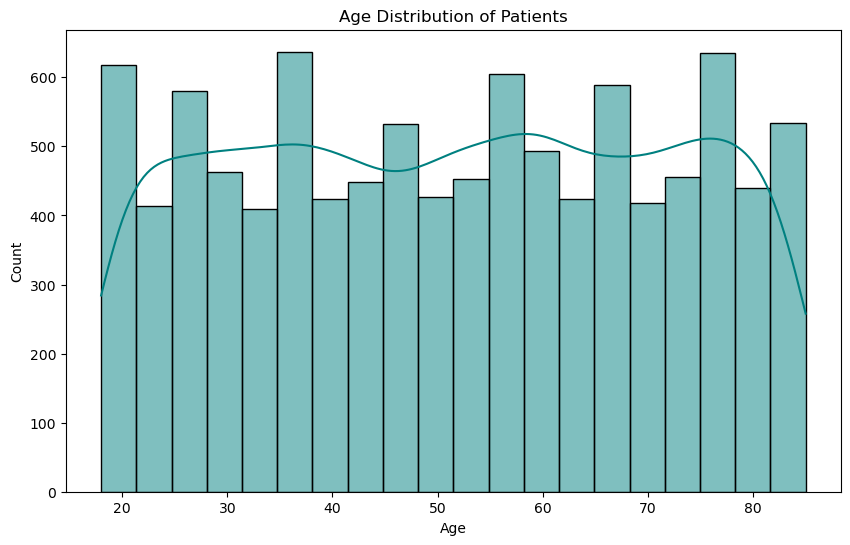

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of patient ages
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='teal')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


## Step 2.2 - Billing Amount by Medical Condition

**Create a box plot to visualize how billing amounts vary by medical conditions.**  
This can reveal how different conditions impact costs.

C:\Users\diyor\AppData\Local\Temp\ipykernel_8136\1047680340.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




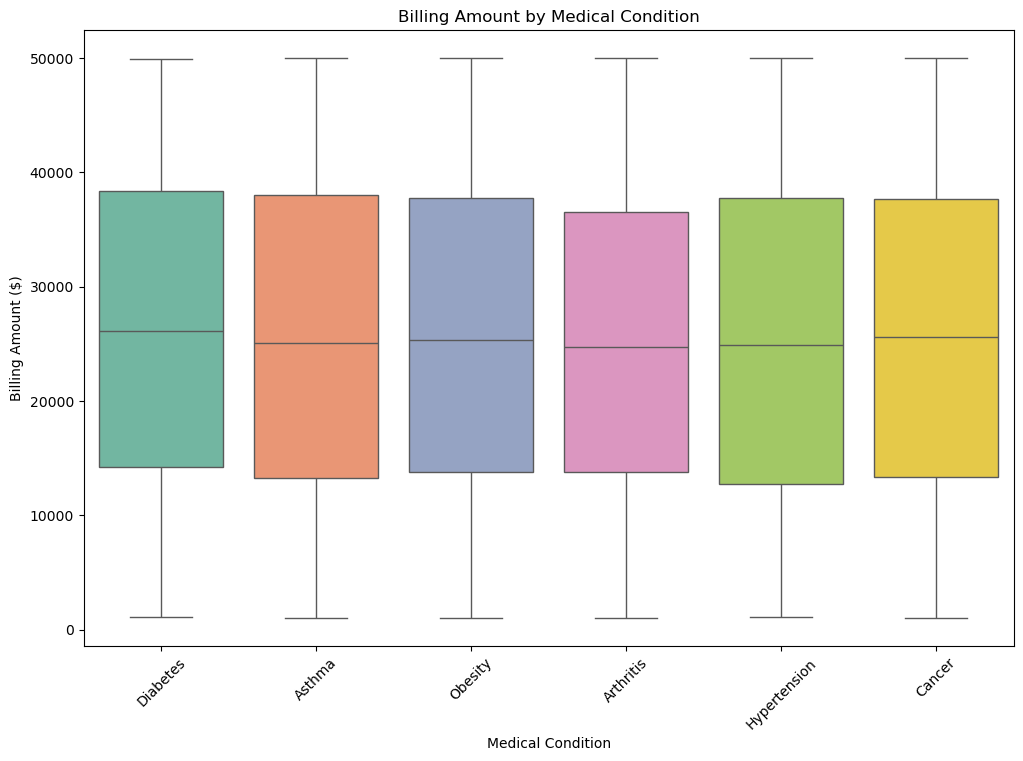

In [39]:
# Box plot of billing amounts by medical condition
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Medical Condition', y='Billing Amount', palette='Set2')
plt.title('Billing Amount by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Billing Amount ($)')
plt.xticks(rotation=45)
plt.show()


## Step 2.3 - Gender Distribution

**Visualize the gender distribution to see if there's any skew in the dataset.**

C:\Users\diyor\AppData\Local\Temp\ipykernel_8136\1877883966.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




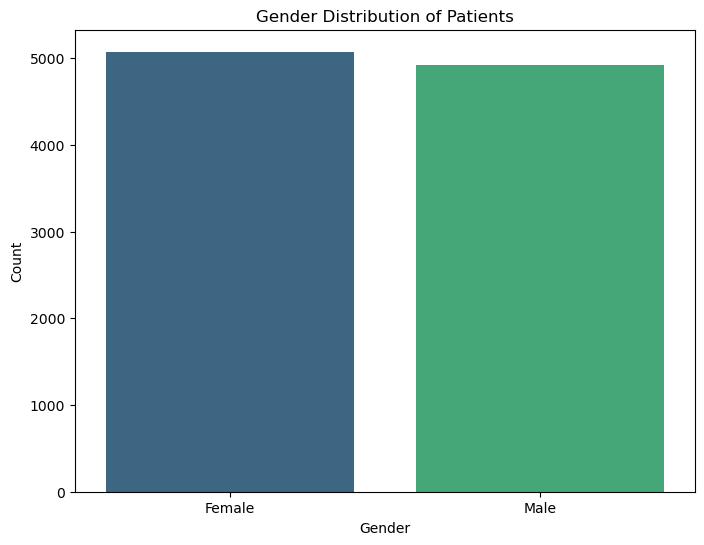

In [43]:
# Plot the gender distribution
plt.figure(figsize=(8, 6))
gender_counts = df['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.title('Gender Distribution of Patients')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



# Step 3: Performance Monitoring

**Objective**: Track Key Performance Indicators (KPIs) like average billing, patient demographics, and hospital performance. This will help identify areas for improvement.

## Step 3.1 - Calculate KPIs

**Compute statistics such as average billing amount and identify top hospitals by the number of admissions.**

In [45]:
# Calculate KPIs
average_billing = df['Billing Amount'].mean()
average_age = df['Age'].mean()
top_hospitals = df['Hospital'].value_counts().head(5)

print(f"Average Billing Amount: ${average_billing:.2f}")
print(f"Average Age of Patients: {average_age:.1f} years")

# Top 5 hospitals with the highest number of admissions
print("\nTop 5 Hospitals by Number of Admissions:")
print(top_hospitals)


Average Billing Amount: $25516.81
Average Age of Patients: 51.5 years

Top 5 Hospitals by Number of Admissions:
Hospital
Smith PLC         19
Smith and Sons    17
Smith Ltd         14
Smith Inc         14
Johnson PLC       13
Name: count, dtype: int64


# Step 3.2 - Visualizing KPIs
## Create Bar Plots for Hospital Performance
The objective is to visualize hospital performance by displaying which hospitals handle the most admissions. 

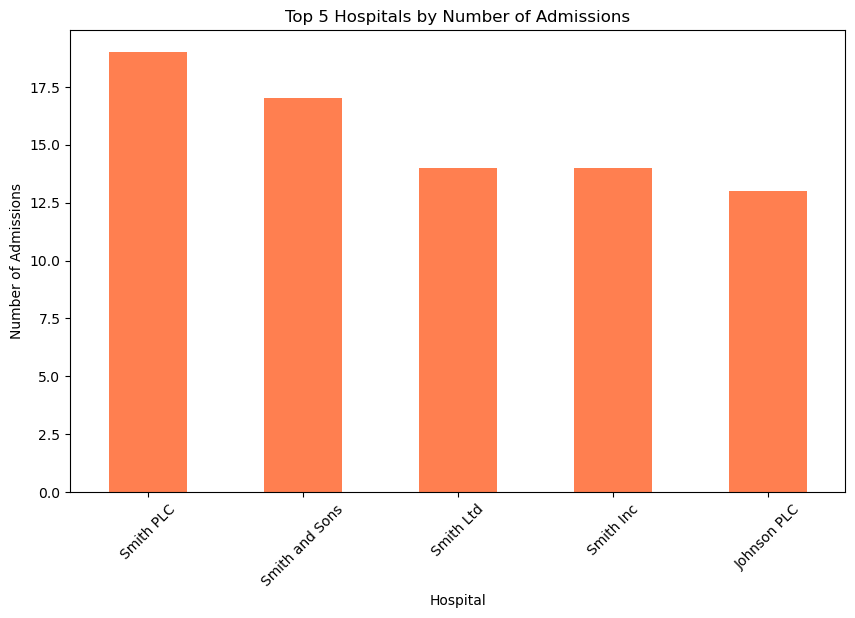

In [47]:
# Visualize top 5 hospitals by the number of admissions
plt.figure(figsize=(10, 6))
top_hospitals.plot(kind='bar', color='coral')
plt.title('Top 5 Hospitals by Number of Admissions')
plt.xlabel('Hospital')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)
plt.show()


# Step 4: Predictive Modeling
## Objective
Use statistical techniques to predict trends. Here, we’ll create a simple predictive model to identify if a patient might have a certain condition.

---

# Step 4.1 - Data Preparation for Predictive Modeling

## Convert Categorical Variables into Numerical Format
To prepare the dataset for modeling, we need to convert categorical variables into numerical format. This allows machine learning algorithms to interpret the data correctly.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Encoding Gender as a numerical value
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})  # Male: 0, Female: 1

# Prepare features and target for predicting if a patient has 'Diabetes'
X = df[['Age', 'Gender']]
y = (df['Medical Condition'] == 'Diabetes').astype(int)  # Target variable (Diabetes or not)

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Step 4.2 - Build and Evaluate the Model

## Train a Logistic Regression Model
In this step, we will train a logistic regression model to predict the presence of diabetes based on the prepared dataset.

In [51]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model's accuracy
y_pred = model.predict(X_test)
print("\nModel Performance - Diabetes Prediction:")
print(classification_report(y_test, y_pred))
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")



Model Performance - Diabetes Prediction:
              precision    recall  f1-score   support

           0       0.84      1.00      0.92      2531
           1       0.00      0.00      0.00       469

    accuracy                           0.84      3000
   macro avg       0.42      0.50      0.46      3000
weighted avg       0.71      0.84      0.77      3000

Model Accuracy: 0.84


C:\Users\diyor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\diyor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\diyor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Step 5: Data Quality Assurance

## Objective
Ensure data integrity and consistency throughout the analysis process. Implement checks for data quality and anomalies.

---

# Step 5.1 - Check for Consistency

In this step, we will regularly inspect the dataset for missing values and outliers to maintain data quality.

## Check for Missing Values
We will check for any missing values in the dataset and decide on a strategy to handle them.



Checking for any remaining null values:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
Length of Stay        0
Age_Group             0
Admission_Season      0
Billing_Tier          0
Cluster               0
dtype: int64


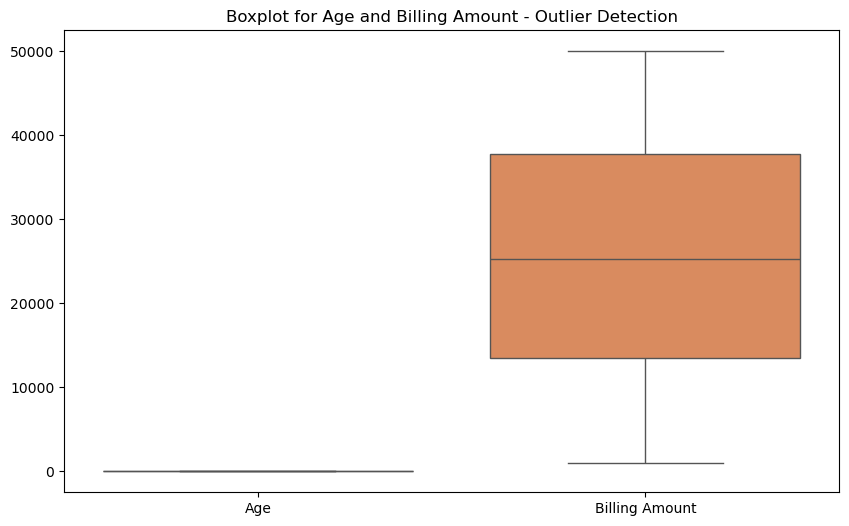

In [53]:
# Check for missing values again after data cleaning
print("\nChecking for any remaining null values:")
print(df.isnull().sum())

# Visualize outliers in numerical columns using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Age', 'Billing Amount']], palette='muted')
plt.title('Boxplot for Age and Billing Amount - Outlier Detection')
plt.show()


In [ ]:
Step 5.2 - Data Type Consistency
Ensure that columns are in the correct format, and adjust data types if necessary.

In [55]:
# Check the data types
print("\nData Types Before Conversion:")
print(df.dtypes)

# Convert 'Date of Admission' and 'Discharge Date' to datetime format
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Check the data types again after conversion
print("\nData Types After Conversion:")
print(df.dtypes)



Data Types Before Conversion:
Name                          object
Age                            int64
Gender                         int64
Blood Type                    object
Medical Condition             object
Date of Admission     datetime64[ns]
Doctor                        object
Hospital                      object
Insurance Provider            object
Billing Amount               float64
Room Number                    int64
Admission Type                object
Discharge Date        datetime64[ns]
Medication                    object
Test Results                  object
Length of Stay                 int64
Age_Group                   category
Admission_Season              object
Billing_Tier                category
Cluster                        int32
dtype: object

Data Types After Conversion:
Name                          object
Age                            int64
Gender                         int64
Blood Type                    object
Medical Condition             object
